# Project Notebook v2

# Notes
    * Need to figure out how to rename empty cells for parents
    * Need to combine disc buy and digital buy into just total buy for numbers and percents
    * Need to figure out how to split a groupby over more than one line
    * Need to figure out how to use compound logic/conditions in a groupby

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [56]:
# loads in csv
dtt = pd.read_csv("Data\DTT Final Data w labels.csv",index_col=0)
dtt.head()

,Gender,Age,Age_Breaks,Region2,Race,Language_Dominance,Parent,HH_Income,Employment,Education,...,Rented_Digital_iVOD,Rented_Digital_sVOD,Rented_Digital_cVOD,cqhidGroup,filter_$,ZTotal_Paid_HE_Movies,Buy_Disc_Percent,Buy_Digital_Percent,Rent_Disc_Percent,Rent_Digital_Percent
respid,,,,,,,,,,,,,,,,,,,,,
44,Female,20,18-24,South,Black,,,1 - < $20K,4 - Not employed,2 - HS Grad,...,5,18,4,Gen-Pop,Selected,1.492690,0.363636,0.0,0.145455,0.490909
108,Male,31,25-34,Northeast,Hispanic,Only English,No,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,0,0,Gen-Pop,Selected,0.009386,0.157895,0.0,0.842105,0.000000
147,Female,19,18-24,South,White,,,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,5,0,Gen-Pop,Selected,-0.567454,0.000000,0.0,0.000000,1.000000
171,Female,18,18-24,Northeast,White,,,1 - < $20K,2 - Part time,3 - Some coll,...,0,7,0,Gen-Pop,Selected,-0.485048,0.000000,0.0,0.000000,1.000000
174,Female,54,45-54,South,White,,No,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,50,0,Gen-Pop,Selected,1.286676,0.000000,0.0,0.000000,1.000000


In [99]:
print dtt.Parent.unique()

[' ' 'No' 'Yes']


In [57]:
#Calculates all rollups and adds as columns

#total movies bought on disc
dtt['Total Discs Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'])

#total movies rented on disc
dtt['Total Discs Rented'] = (dtt['Rented_Disc_Kiosk'] + dtt['Rented_Disc_Mail'] + dtt['Rented_Disc_Store'])

#total movies rented on digital
dtt['Total Digital Rented'] = (dtt['Rented_Digital_cVOD'] + dtt['Rented_Digital_iVOD'] + dtt['Rented_Digital_sVOD'])

#total movies purchased
dtt['Total Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'] + dtt['Bought_Digital'])

#total movies purchased as percent of total
dtt['Buy_percent'] = dtt['Total Bought']/dtt['Total_Paid_HE_Movies']


In [58]:
for x in dtt.columns.values:
    print x

Gender
Age
Age_Breaks
Region2
Race
Language_Dominance
Parent
HH_Income
Employment
Education
Marital_Status
Total_Paid_HE_Movies
Bought_Disc_DVD
Bought_Disc_BD
Bought_Digital
Rented_Disc_Store
Rented_Disc_Kiosk
Rented_Disc_Mail
Rented_Digital_iVOD
Rented_Digital_sVOD
Rented_Digital_cVOD
cqhidGroup
filter_$
ZTotal_Paid_HE_Movies
Buy_Disc_Percent
Buy_Digital_Percent
Rent_Disc_Percent
Rent_Digital_Percent
Total Discs Bought
Total Discs Rented
Total Digital Rented
Total Bought
Buy_percent


# Key Measures by Demographics

In [59]:
Cons_Meas_wTot = ['Total_Paid_HE_Movies','Total Bought','Total Discs Rented',
                  'Total Digital Rented']

Cons_Meas_noTot = ['Total Bought','Total Discs Rented','Total Digital Rented']

### Consumption by Gender

In [60]:
dtt.groupby(dtt.Gender)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Gender,,,,
Female,15.535457,3.151079,3.685509,8.698869
Male,16.768908,4.050420,4.014706,8.703782


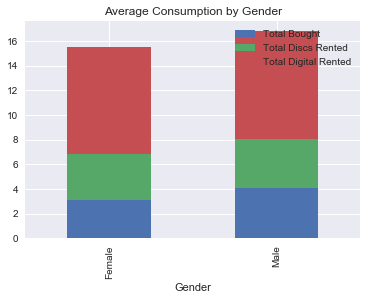

In [61]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=True,title = "Average Consumption by Gender")

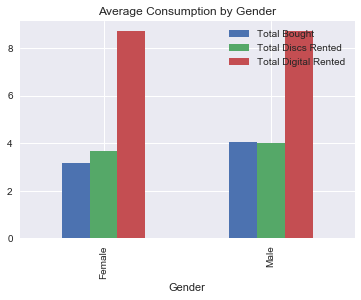

In [62]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=False,title = "Average Consumption by Gender")

### Consumption by Age Breaks

In [63]:
dtt.groupby(dtt.Age_Breaks)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Age_Breaks,,,,
12-17,16.028736,3.321839,4.017241,8.689655
18-24,15.015385,3.553846,2.888462,8.573077
25-34,19.552198,4.961538,4.129121,10.461538
35-44,19.269231,4.272189,4.656805,10.340237
45-54,14.893733,3.313351,3.476839,8.103542
55-64,13.156250,2.736111,3.770833,6.649306
65-74,11.208955,1.238806,3.873134,6.097015


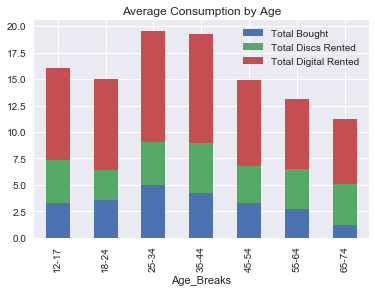

In [64]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Age')

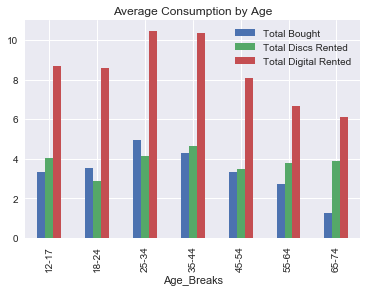

In [65]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Age')

### Consumption by Race

In [66]:
dtt.groupby(dtt.Race)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Race,,,,
Asian,14.287356,3.517241,3.517241,7.252874
Black,16.890110,4.236264,3.186813,9.467033
Hispanic,19.531646,4.420886,5.367089,9.743671
Other,17.125000,3.562500,4.291667,9.270833
White,15.301084,3.310372,3.575851,8.414861


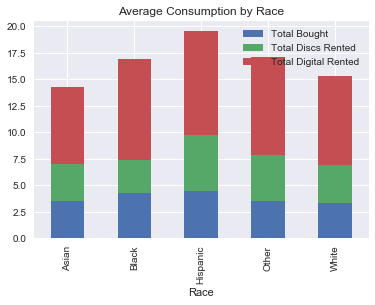

In [67]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Race')

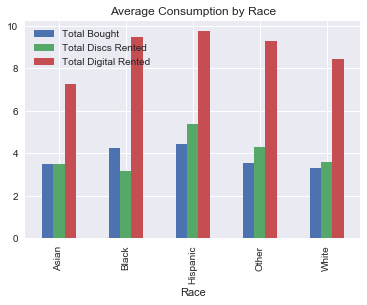

In [68]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Race')

### Consumption by Employment Status

In [69]:
dtt.groupby(dtt.Employment)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Employment,,,,
1 - Full time,18.290389,4.309816,4.423313,9.557260
2 - Part time,15.083665,3.446215,3.326693,8.310757
3 - Retired,12.918552,1.909502,3.909502,7.099548
4 - Not employed,13.791579,2.989474,2.911579,7.890526


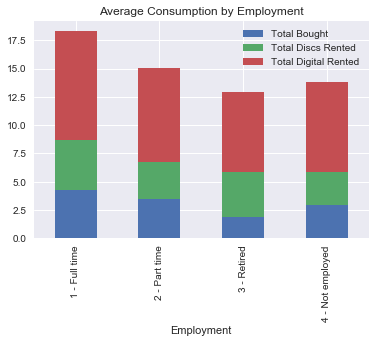

In [70]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Employment')

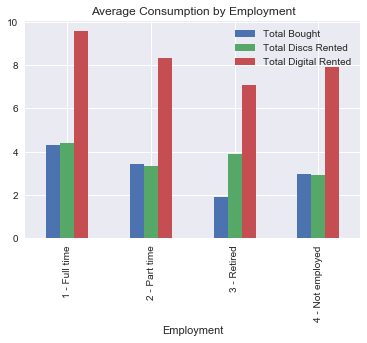

In [71]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Employment')

### Consumption by Education

In [72]:
dtt.groupby(dtt.Education)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Education,,,,
1 - HS or less,13.870229,2.854962,2.923664,8.091603
2 - HS Grad,15.467857,3.796429,3.089286,8.582143
3 - Some coll,15.831325,2.975904,3.891566,8.963855
4 - Coll Grad,17.709677,4.480475,4.193548,9.035654
5 - Some Post-grad,17.278689,2.377049,4.950820,9.950820
6 - Post-grad,15.200000,3.451852,4.029630,7.718519
7 - Prefer not to answer,11.153846,3.076923,3.000000,5.076923


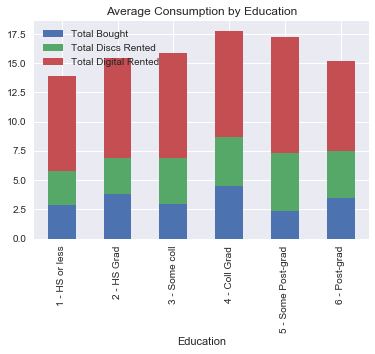

In [73]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])

gby_educ.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Education')

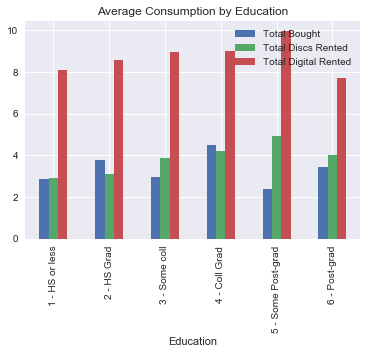

In [74]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])
gby_educ.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Education')

### Consumption by Marital Status

In [75]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Marital_Status,,,,
Living with a partner,17.082192,3.616438,3.458904,10.006849
Married,16.836858,3.832830,4.327291,8.676737
Single,15.219160,3.320210,3.321522,8.577428


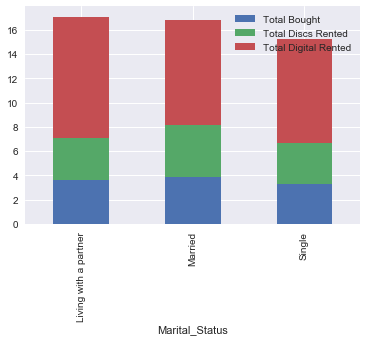

In [76]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',stacked = True)

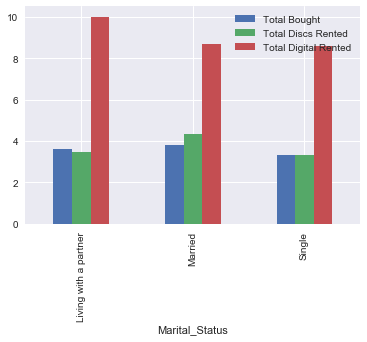

In [77]:
dtt.groupby(
    dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                                   stacked = False)

### Consumption by Parental status

In [78]:
dtt.Parent.value_counts()

No     944
Yes    719
       262
Name: Parent, dtype: int64

In [79]:
dtt.Parent.unique()

array([' ', 'No', 'Yes'], dtype=object)

In [80]:
dtt.groupby(dtt.Parent [(dtt.Parent == "Yes") | (dtt.Parent == "No")])[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Parent,,,,
No,14.310381,2.863347,3.264831,8.182203
Yes,18.781641,4.649513,4.713491,9.418637


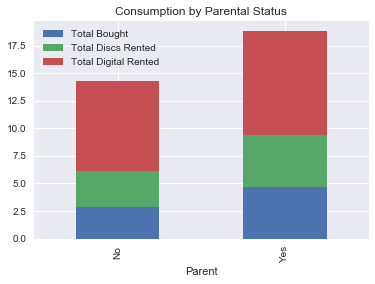

In [81]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = True)

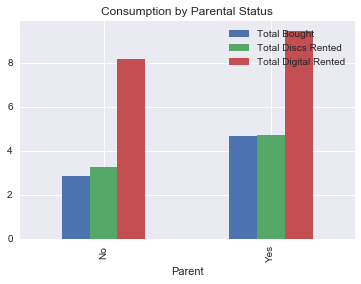

In [82]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = False)

### Consumption by Income (TO DO)

### Consumption Distributions

Probably need to combine disc and digital purchase into just purchase

In [83]:
dtt_numbers = dtt[['Total_Paid_HE_Movies','Total Discs Bought','Bought_Digital','Total Discs Rented',
      'Total Digital Rented','Buy_Disc_Percent','Buy_Digital_Percent','Rent_Disc_Percent',
      'Rent_Digital_Percent']]

dtt_numbers.shape

(1925, 9)

In [84]:
dtt_numbers.describe()

,Total_Paid_HE_Movies,Total Discs Bought,Bought_Digital,Total Discs Rented,Total Digital Rented,Buy_Disc_Percent,Buy_Digital_Percent,Rent_Disc_Percent,Rent_Digital_Percent
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,16.145455,2.872208,0.723636,3.848312,8.701299,0.239981,0.041825,0.234541,0.483653
std,16.526946,4.604784,2.081871,6.915127,11.978178,0.306352,0.111739,0.292798,0.369288
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.133333
50%,10.000000,1.000000,0.000000,1.000000,5.000000,0.136364,0.000000,0.116279,0.483871
75%,22.000000,4.000000,1.000000,5.000000,11.000000,0.333333,0.014925,0.375000,0.833333
max,91.000000,55.000000,30.000000,70.000000,90.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
print "Correlations across Consumption"
dtt_numbers[['Total_Paid_HE_Movies','Total Discs Bought','Bought_Digital', 'Total Digital Rented','Total Discs Rented']].corr()



Correlations across Consumption


,Total_Paid_HE_Movies,Total Discs Bought,Bought_Digital,Total Digital Rented,Total Discs Rented
Total_Paid_HE_Movies,1.000000,0.453878,0.353621,0.816166,0.567532
Total Discs Bought,0.453878,1.000000,0.301445,0.088601,0.174629
Bought_Digital,0.353621,0.301445,1.000000,0.133707,0.111749
Total Digital Rented,0.816166,0.088601,0.133707,1.000000,0.119190
Total Discs Rented,0.567532,0.174629,0.111749,0.119190,1.000000


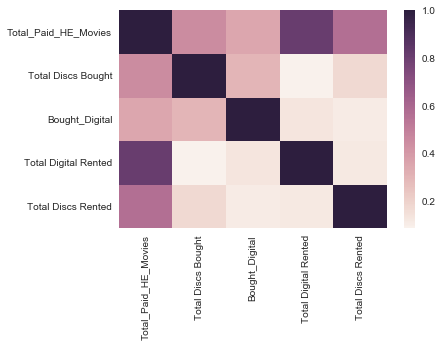

In [86]:
corr = dtt_numbers[
    ['Total_Paid_HE_Movies','Total Discs Bought','Bought_Digital',
     'Total Digital Rented','Total Discs Rented']].corr()

sns.heatmap(corr)

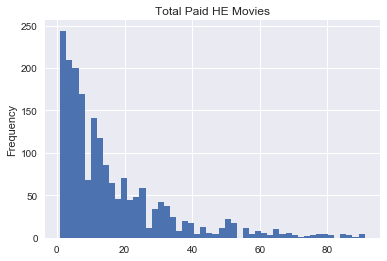

In [87]:
dtt.Total_Paid_HE_Movies.plot(kind='hist', bins = 50, title = 'Total Paid HE Movies')

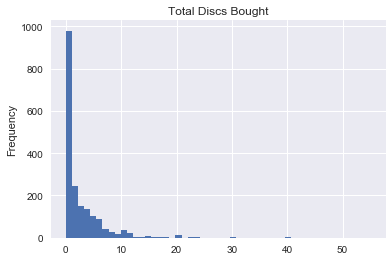

In [88]:
dtt['Total Discs Bought'].plot(kind='hist', bins = 50, title = 'Total Discs Bought')

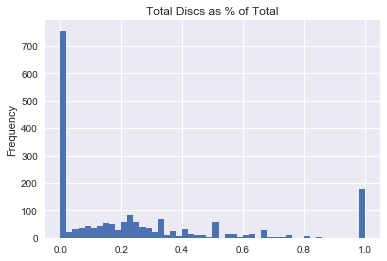

In [89]:
dtt['Buy_Disc_Percent'].plot(kind='hist', bins = 50, title = 'Total Discs as % of Total')

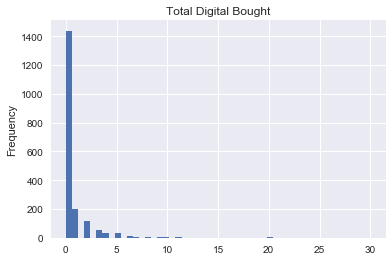

In [90]:
dtt['Bought_Digital'].plot(kind='hist', bins = 50, title = 'Total Digital Bought')

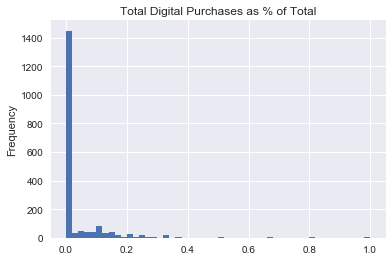

In [91]:
dtt['Buy_Digital_Percent'].plot(kind='hist', bins = 50, title = 'Total Digital Purchases as % of Total')

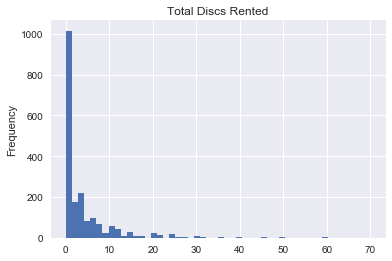

In [92]:
dtt['Total Discs Rented'].plot(kind='hist', bins = 50, title = 'Total Discs Rented')

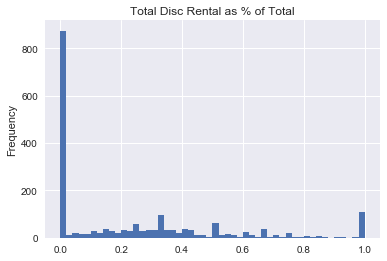

In [93]:
dtt['Rent_Disc_Percent'].plot(kind='hist', bins = 50, title = 'Total Disc Rental as % of Total')

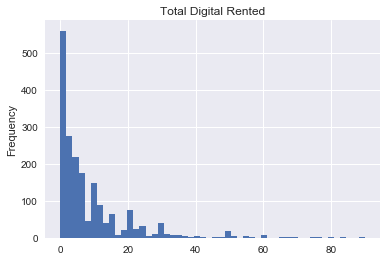

In [94]:
dtt['Total Digital Rented'].plot(kind='hist', bins = 50, title = 'Total Digital Rented')

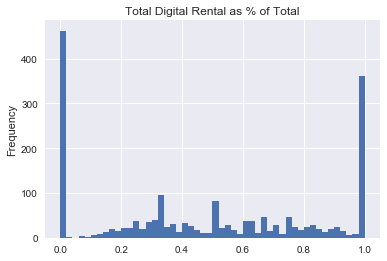

In [95]:
dtt['Rent_Digital_Percent'].plot(kind='hist', bins = 50, title = 'Total Digital Rental as % of Total')

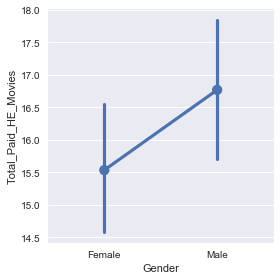

In [113]:
demos = ['Gender', 'Age_Breaks', 'Region2', 'Race', 'Parent', 'HH_Income', 'Employment', 'Education', 'Marital_Status']

sns.factorplot(data=dtt, x='Gender', y='Total_Paid_HE_Movies', hue=None)


# Model Building